<a href="https://colab.research.google.com/github/anubhavgupta1/Data---Science/blob/main/Visualization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir ("drive/Udacity/data science/")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import urllib.request
import json

import seaborn as sns
sns.set(color_codes=True)

## Plotting the composition of data

### Static composition : Pie Chart

In [3]:
penguins = sns.load_dataset('penguins')


In [4]:
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
penguins.groupby('species')['species'].count()


species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

In [6]:
species = penguins.groupby('species')['species'].count()


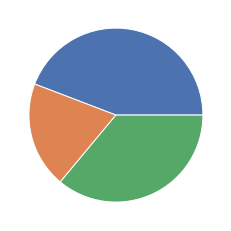

In [7]:
plt.pie(species);
plt.show()

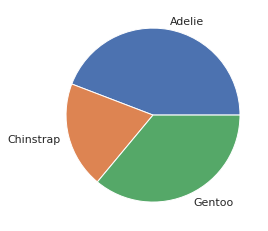

In [8]:
plt.pie(species, labels=species.index);
plt.show()

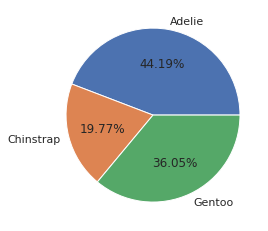

In [9]:
plt.pie(species, labels=species.index, autopct="%.2f%%");
plt.show()

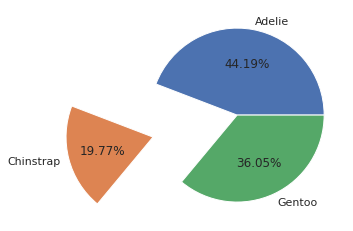

In [10]:
plt.pie(species, labels=species.index, autopct="%.2f%%",
        explode=[0, 1, 0]);
plt.show()

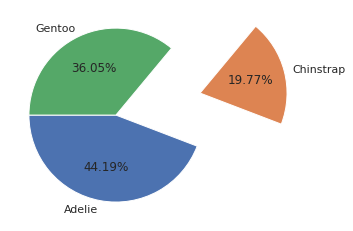

In [11]:
plt.pie(species, labels=species.index, autopct="%.2f%%",
        explode=[0, 1, 0], startangle=180);
plt.show()

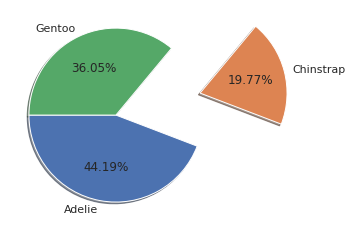

In [12]:
plt.pie(species, labels=species.index, autopct="%.2f%%",
        explode=[0, 1, 0], startangle=180, shadow=True);
plt.show()

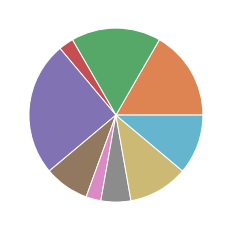

In [13]:
plt.pie(np.random.randint(0, 10, 10));
plt.show()

### Static Composition : Donut chart

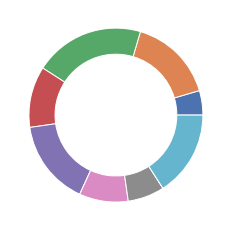

In [14]:
plt.pie(np.random.randint(0, 10, 10), wedgeprops=dict(width=0.3));
plt.show()

In [15]:
cmap = plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))

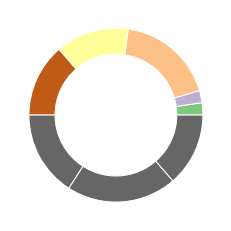

In [16]:
plt.pie(np.random.randint(0, 10, 10), 
        wedgeprops=dict(width=0.3),
        colors=my_colours);
plt.show()

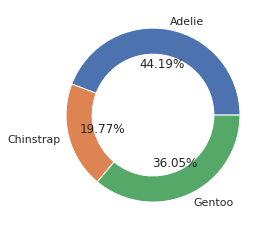

In [17]:
plt.pie(species, labels=species.index, autopct="%.2f%%", wedgeprops=dict(width=0.3));
plt.show()

In [18]:
island = penguins.groupby('island')['island'].count()


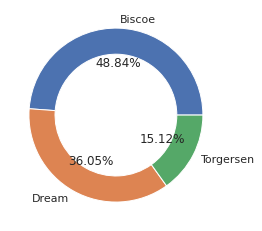

In [19]:
plt.pie(island, labels=island.index, autopct="%.2f%%", wedgeprops=dict(width=0.3));
plt.show()

In [20]:
c = pd.crosstab(penguins.species, penguins.island)
c = c.T
c

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


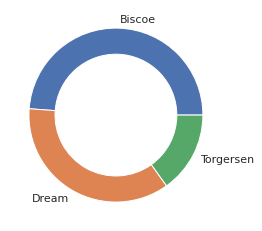

In [21]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3));

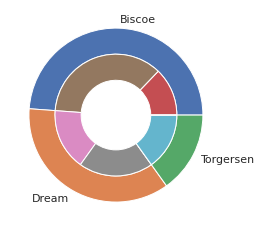

In [22]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3));
plt.pie(c.values.flatten(), radius=0.7, 
        wedgeprops=dict(width=0.3));

In [23]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

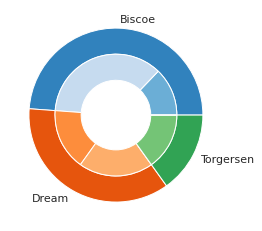

In [24]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, 
        wedgeprops=dict(width=0.3),
        colors=inner_colors);

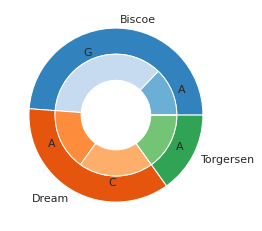

In [25]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors,);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colors);

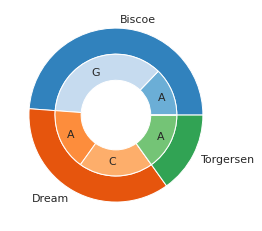

In [26]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colors,
        labeldistance=0.75);

In [27]:
cmap = plt.get_cmap('tab20b')
outer_colors = cmap(np.array([0, 4, 8]))
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

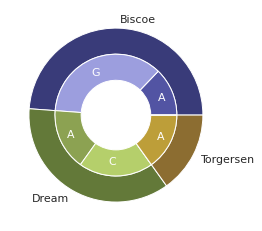

In [28]:
plt.pie(c.sum(axis=1), labels=c.index, 
        radius = 1, wedgeprops=dict(width=0.3), 
        colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, 
        labels = ['A', '', 'G', 'A', 'C', '', 'A', '', ''],
        wedgeprops=dict(width=0.3),
        colors=inner_colors,
        labeldistance=0.75, textprops=dict(color='w'));

### Stacked bar plot

In [29]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7fa711c68cd0>)

In [30]:
with open('data.json') as f:
  data = json.load(f)

In [31]:
data = data['states_daily']

In [32]:
df = pd.json_normalize(data)

In [33]:
df.head()


,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [34]:
df_ = df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.drop('dateymd', axis=1, inplace=True)
df_.drop('tt', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df_.set_index('status', inplace=True)
df_

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Confirmed,31,5963,65,1367,7487,612,13834,0,23686,121,940,11403,1695,6842,4290,1516,15785,13644,175,117,58924,110,54,12897,45,13,4445,4622,565,11967,9,4009,10941,32,0,28211,2160,8426
Recovered,12,2569,11,312,2619,429,12678,0,21500,78,428,4179,593,3663,1777,813,7098,4305,123,17,52412,33,12,6836,9,0,1503,3418,336,2408,3,1878,6172,15,0,10978,532,4608
Deceased,0,27,0,7,41,4,175,0,240,0,17,117,13,33,46,6,146,21,0,0,351,1,1,79,0,0,4,83,5,53,0,14,44,0,0,167,24,38


In [36]:
df_ = df_.T
df_ = df_.apply(pd.to_numeric)

In [37]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, an to wb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  38 non-null     int64
 1   Recovered  38 non-null     int64
 2   Deceased   38 non-null     int64
dtypes: int64(3)
memory usage: 2.4+ KB


In [38]:
df_


status,Confirmed,Recovered,Deceased
an,31,12,0
ap,5963,2569,27
ar,65,11,0
as,1367,312,7
br,7487,2619,41
ch,612,429,4
ct,13834,12678,175
dd,0,0,0
dl,23686,21500,240
dn,121,78,0


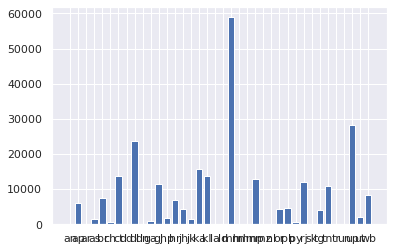

In [39]:
plt.bar(df_.index, df_.Confirmed);

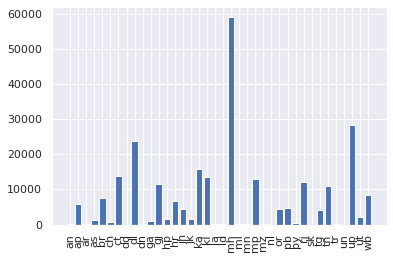

In [40]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation='vertical');

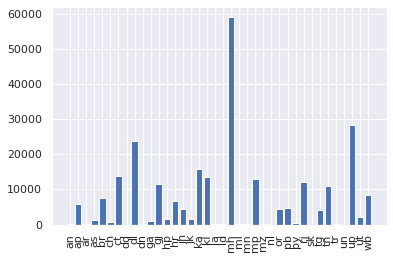

In [41]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation=90);

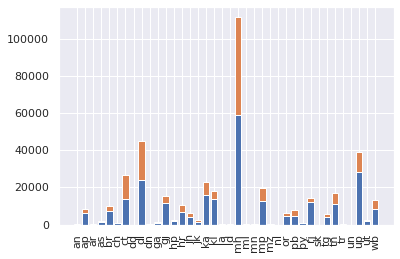

In [42]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.xticks(rotation=90);

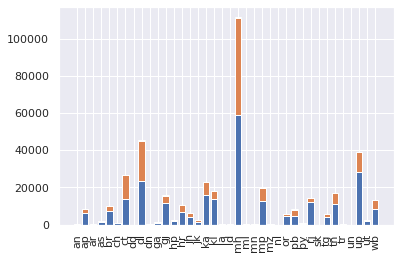

In [43]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

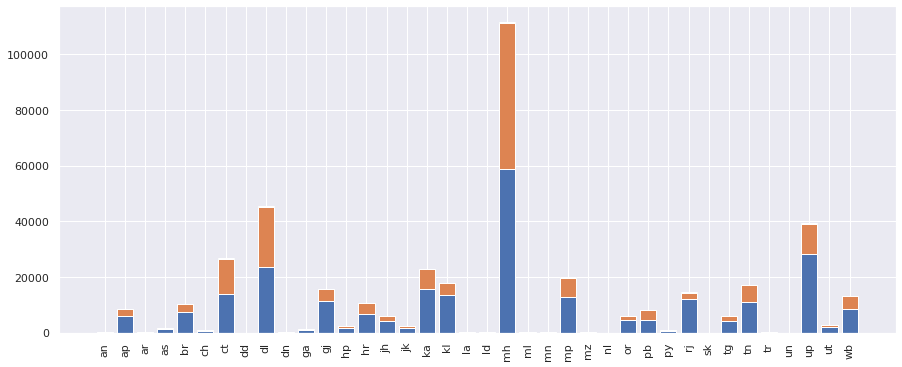

In [44]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered);
plt.xticks(rotation=90);

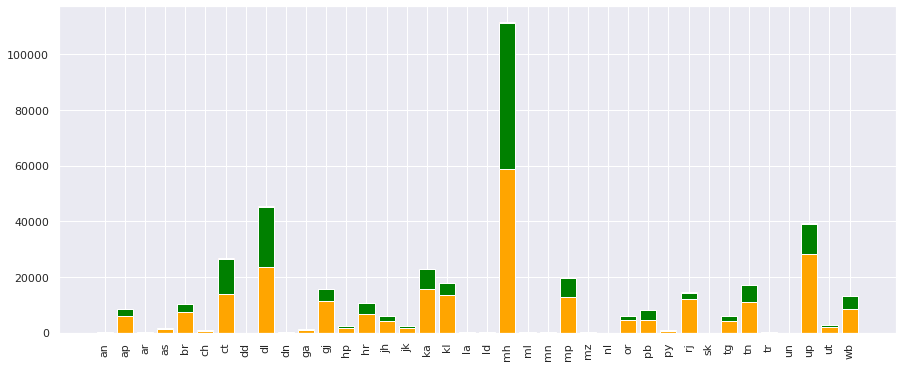

In [45]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

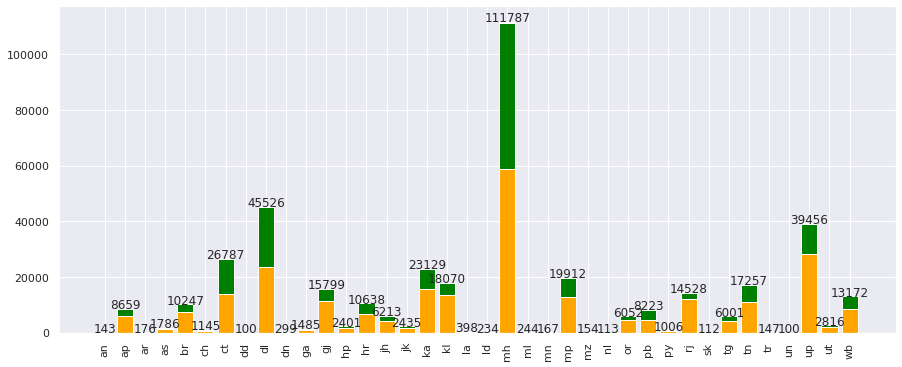

In [46]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha="center");

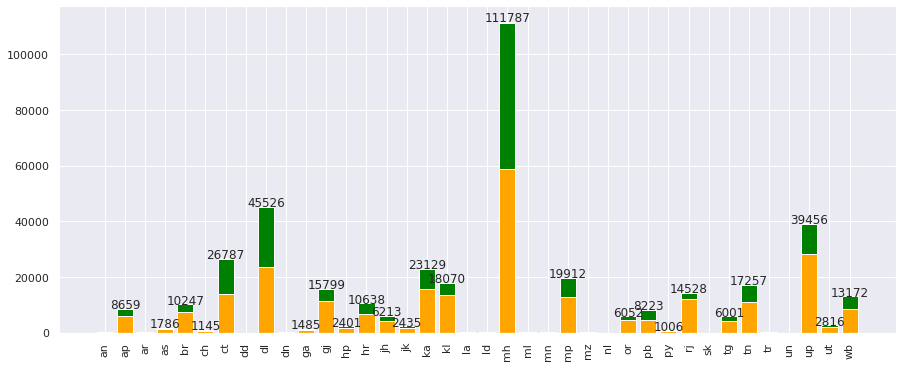

In [47]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

### Relative stacked bar plots

In [48]:
df_.head()


status,Confirmed,Recovered,Deceased
an,31,12,0
ap,5963,2569,27
ar,65,11,0
as,1367,312,7
br,7487,2619,41


In [49]:
df_['Total'] = 0

In [50]:
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,31,12,0,0
ap,5963,2569,27,0
ar,65,11,0,0
as,1367,312,7,0
br,7487,2619,41,0


In [51]:
df_['Total'] = df_.sum(axis = 1)
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,31,12,0,43
ap,5963,2569,27,8559
ar,65,11,0,76
as,1367,312,7,1686
br,7487,2619,41,10147


In [52]:
df_['ConfirmedFraction'] = df_['Confirmed'] / df_['Total']
df_['RecoveredFraction'] = df_['Recovered'] / df_['Total']
df_['DeceasedFraction'] = df_['Deceased'] / df_['Total']
df_.head()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
an,31,12,0,43,0.720930,0.279070,0.000000
ap,5963,2569,27,8559,0.696694,0.300152,0.003155
ar,65,11,0,76,0.855263,0.144737,0.000000
as,1367,312,7,1686,0.810795,0.185053,0.004152
br,7487,2619,41,10147,0.737854,0.258106,0.004041


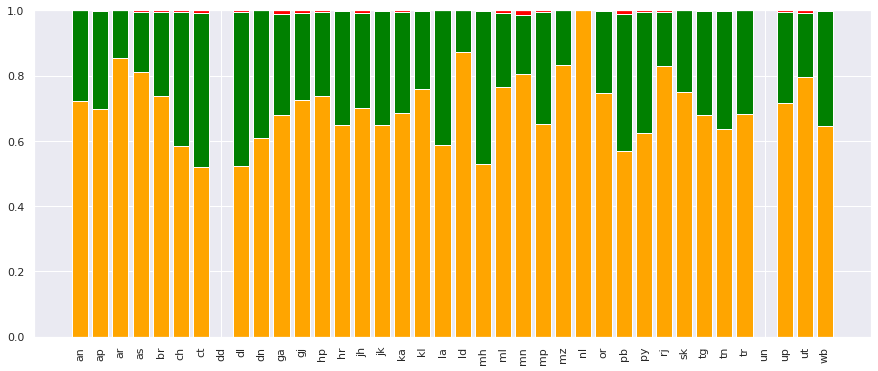

In [53]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

In [54]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)
df_

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
nl,13,0,0,13,1.000000,0.000000,0.000000
ld,117,17,0,134,0.873134,0.126866,0.000000
ar,65,11,0,76,0.855263,0.144737,0.000000
mz,45,9,0,54,0.833333,0.166667,0.000000
rj,11967,2408,53,14428,0.829429,0.166898,0.003673
as,1367,312,7,1686,0.810795,0.185053,0.004152
mn,54,12,1,67,0.805970,0.179104,0.014925
ut,2160,532,24,2716,0.795287,0.195876,0.008837
ml,110,33,1,144,0.763889,0.229167,0.006944
kl,13644,4305,21,17970,0.759265,0.239566,0.001169


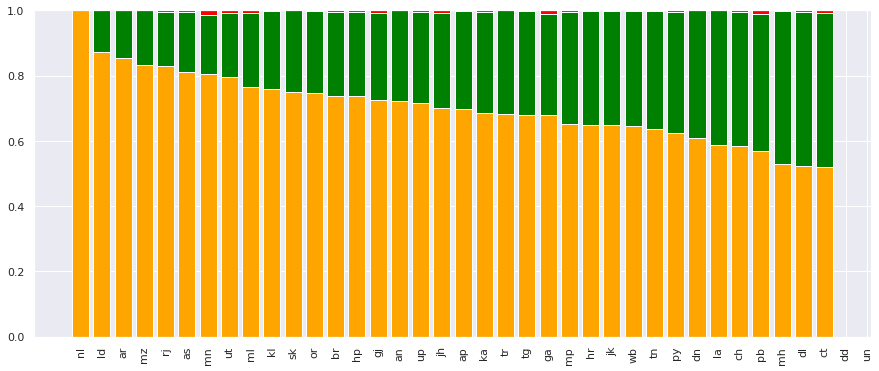

In [55]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.ConfirmedFraction, color='Orange');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color='Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color='Red');
plt.xticks(rotation=90);

In [56]:
df_ = df_.sort_values('Total', ascending=False)
df_

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
mh,58924,52412,351,111687,0.527582,0.469276,0.003143
dl,23686,21500,240,45426,0.521419,0.473297,0.005283
up,28211,10978,167,39356,0.716816,0.278941,0.004243
ct,13834,12678,175,26687,0.518380,0.475063,0.006557
ka,15785,7098,146,23029,0.685440,0.308220,0.006340
mp,12897,6836,79,19812,0.650969,0.345043,0.003987
kl,13644,4305,21,17970,0.759265,0.239566,0.001169
tn,10941,6172,44,17157,0.637699,0.359737,0.002565
gj,11403,4179,117,15699,0.726352,0.266195,0.007453
rj,11967,2408,53,14428,0.829429,0.166898,0.003673


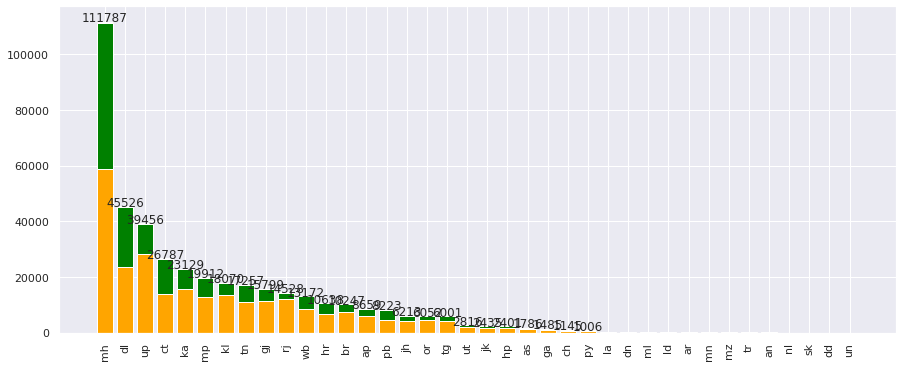

In [57]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val, 'Total'] + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha="center");

In [58]:
df_ = df_.sort_values('Total', ascending=False)
df_

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
mh,58924,52412,351,111687,0.527582,0.469276,0.003143
dl,23686,21500,240,45426,0.521419,0.473297,0.005283
up,28211,10978,167,39356,0.716816,0.278941,0.004243
ct,13834,12678,175,26687,0.518380,0.475063,0.006557
ka,15785,7098,146,23029,0.685440,0.308220,0.006340
mp,12897,6836,79,19812,0.650969,0.345043,0.003987
kl,13644,4305,21,17970,0.759265,0.239566,0.001169
tn,10941,6172,44,17157,0.637699,0.359737,0.002565
gj,11403,4179,117,15699,0.726352,0.266195,0.007453
rj,11967,2408,53,14428,0.829429,0.166898,0.003673


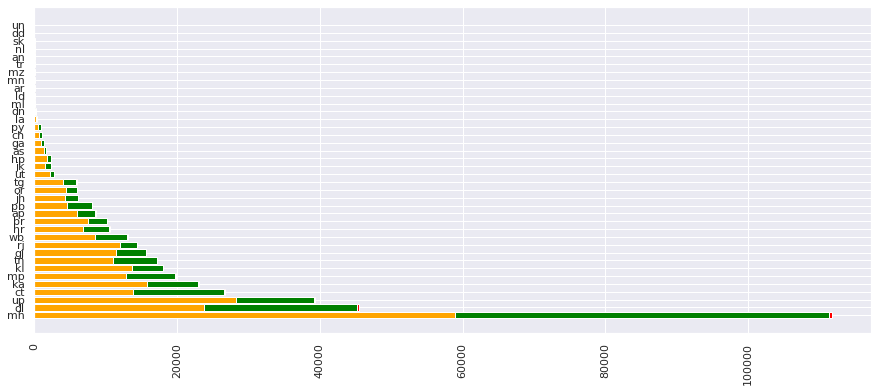

In [59]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.barh(df_.index, df_.Confirmed, color='Orange');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='Green');
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);
#plt.yticks(rotation='vertical');

## Time-varying composition of data

### Stacked area plots

In [60]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [61]:
df_ = df[['kl', 'date', 'status']]
df_.head()

,kl,date,status
0,19,14-Mar-20,Confirmed
1,3,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,5,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [62]:
df_['kl'] = pd.to_numeric(df_['kl'])
df_['date'] = pd.to_datetime(df_['date'])
df_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,kl,date,status
0,19,2020-03-14,Confirmed
1,3,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,5,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


In [63]:
df_ = df_.pivot_table(values="kl", columns="status", index="date")
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,19,0,3
2020-03-15,5,0,0
2020-03-16,3,0,0
2020-03-17,0,0,0
2020-03-18,0,0,0


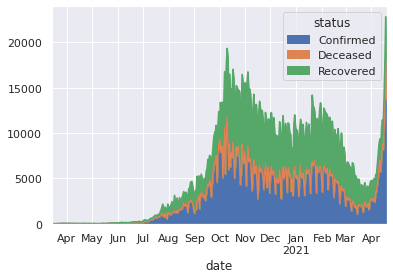

In [64]:
df_.plot.area();

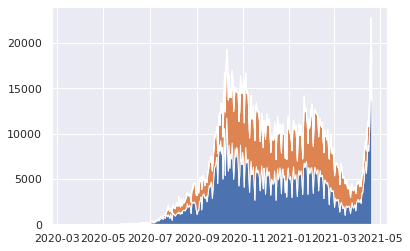

In [65]:
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

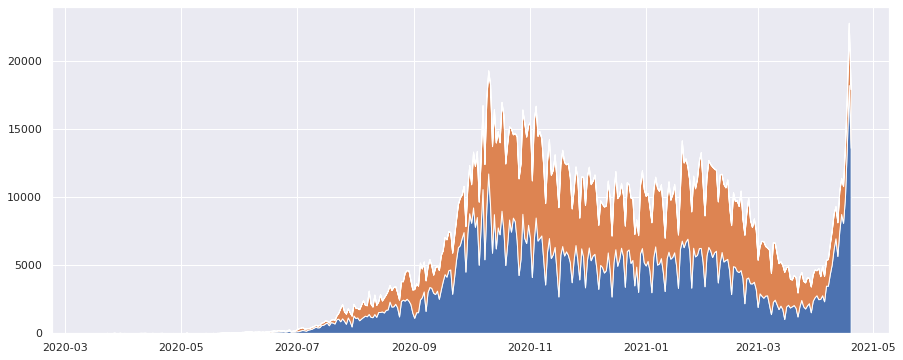

In [66]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

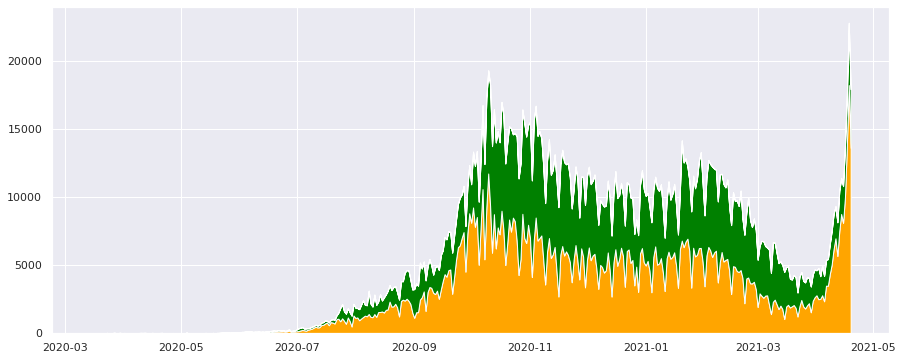

In [67]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              colors=['orange', 'green', 'red']);

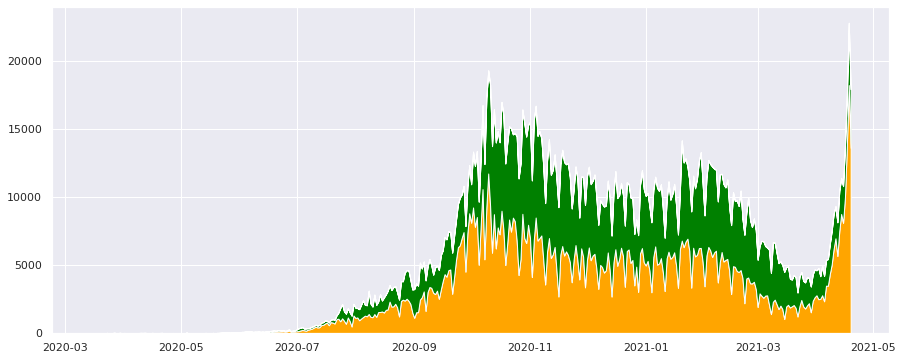

In [68]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);

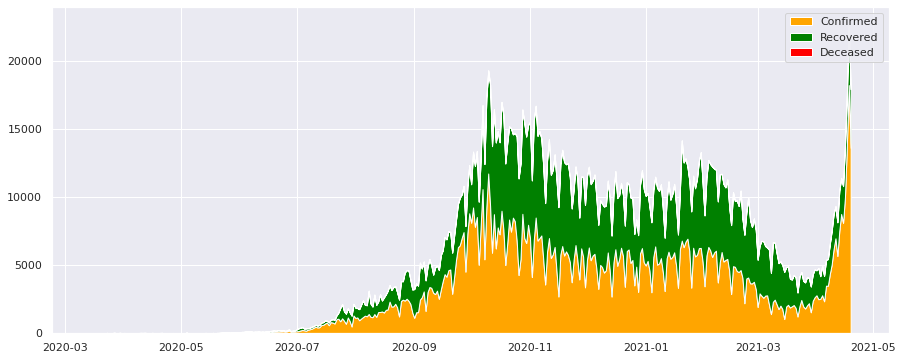

In [69]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

### Relative stacked area plot

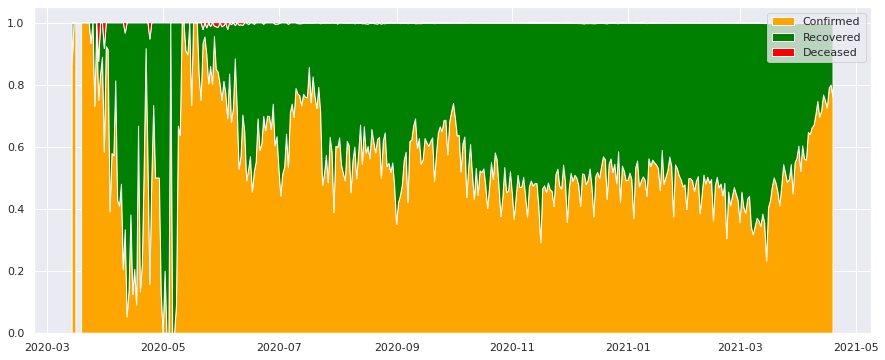

In [70]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
              df_.Recovered/df_.sum(axis=1), 
              df_.Deceased/df_.sum(axis=1),
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();

In [71]:
def plot_stacked_area_by_state(state):
    df_ = df[[state, 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values=state, columns="status", index="date")
    fig = plt.gcf();
    fig.set_size_inches(15, 6);
    plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
                df_.Recovered/df_.sum(axis=1), 
                df_.Deceased/df_.sum(axis=1),
                labels=['Confirmed', 'Recovered', 'Deceased'],
                colors=['orange', 'green', 'red']);
    plt.legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


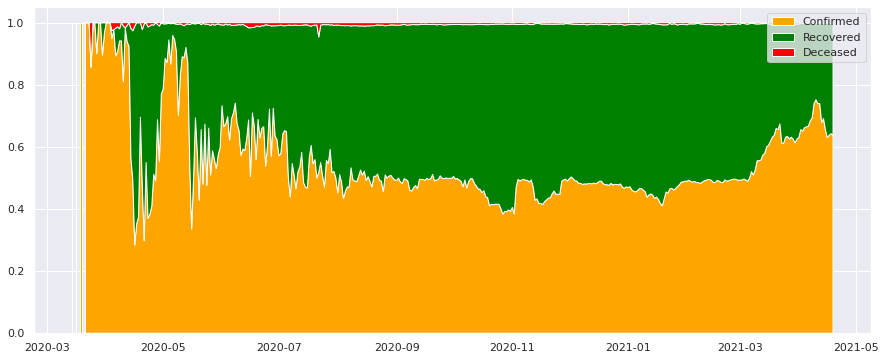

In [72]:
plot_stacked_area_by_state('tn')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


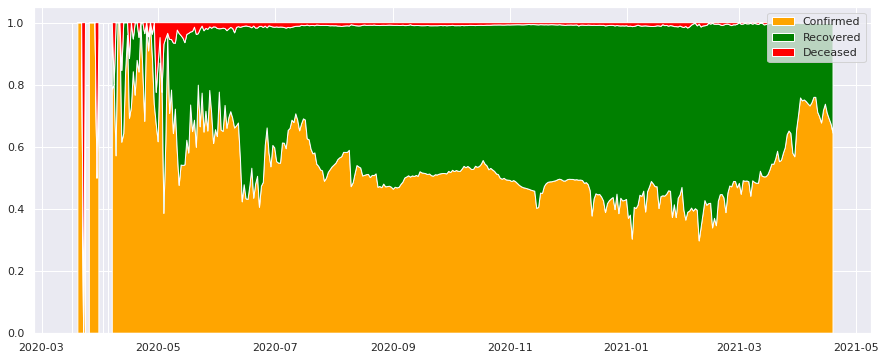

In [73]:
plot_stacked_area_by_state('wb')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


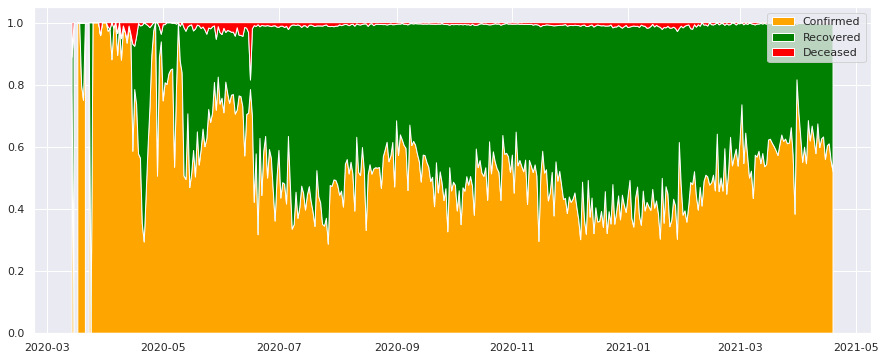

In [74]:
plot_stacked_area_by_state('dl')

##Plotting relationships between data

### Scatter plot

In [75]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


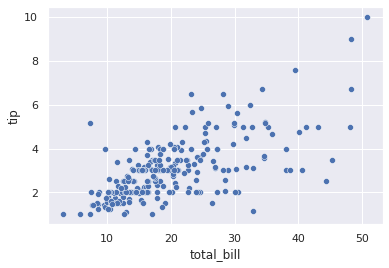

In [76]:
sns.scatterplot(x='total_bill', y='tip', data=tips);

In [77]:
tips['tip_fraction'] = tips['tip']/tips['total_bill']


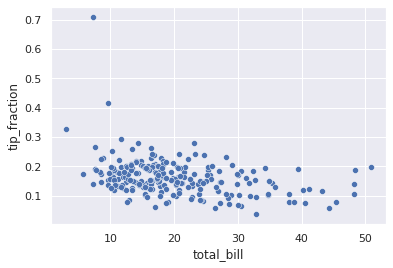

In [78]:
sns.scatterplot(x='total_bill', y='tip_fraction', data=tips);

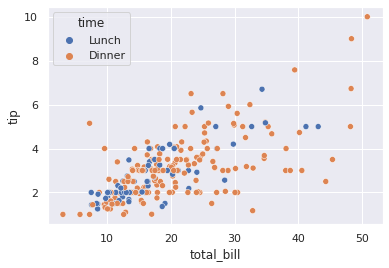

In [79]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='time');

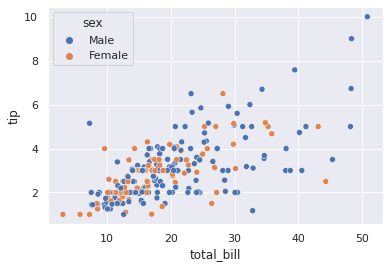

In [80]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='sex')

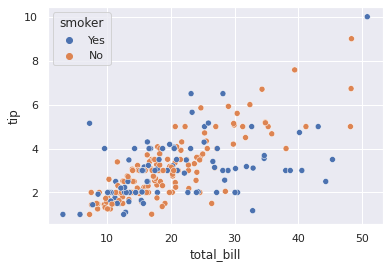

In [81]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='smoker');

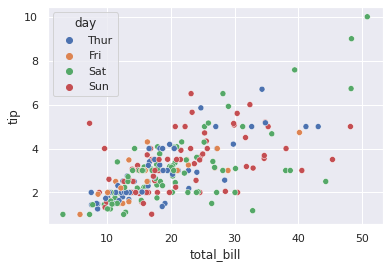

In [82]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='day');

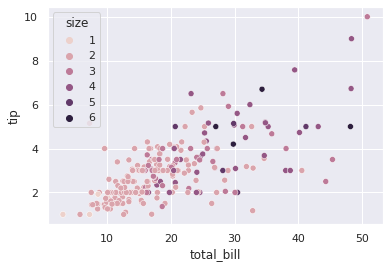

In [83]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='size');

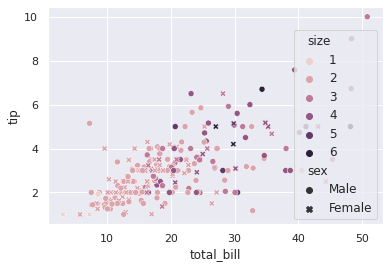

In [84]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='size', style='sex');

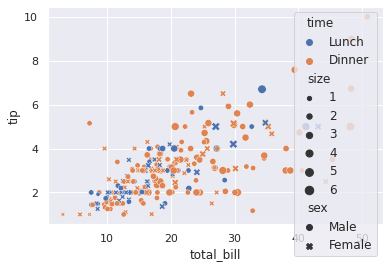

In [85]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='time', style='sex', size='size');

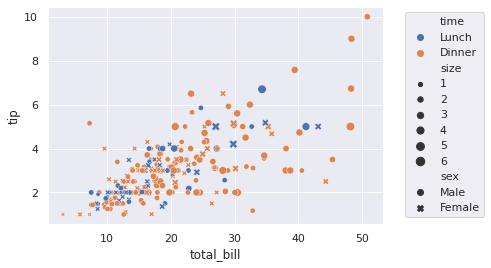

In [86]:
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='time', style='sex', size='size');
plt.legend(bbox_to_anchor=(1.05, 1));

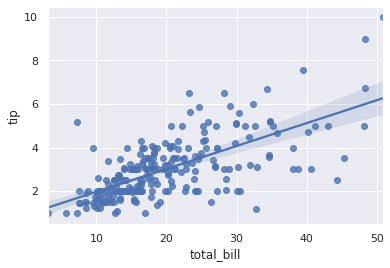

In [87]:
sns.regplot(x='total_bill', y='tip', data=tips);

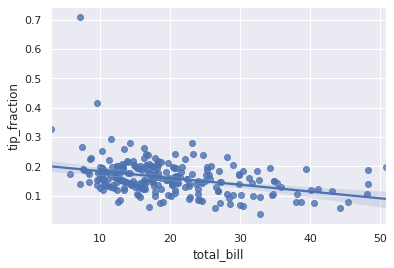

In [88]:
sns.regplot(x='total_bill', y='tip_fraction', data=tips);


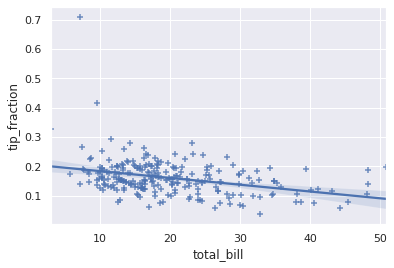

In [89]:
sns.regplot(x='total_bill', y='tip_fraction', data=tips, marker="+");

In [90]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


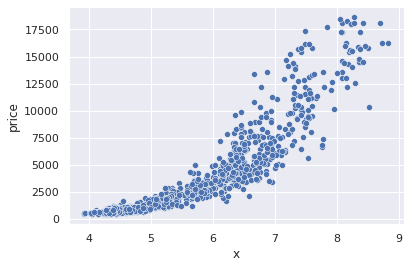

In [91]:
sns.scatterplot('x', 'price', data=diamonds.sample(1000));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


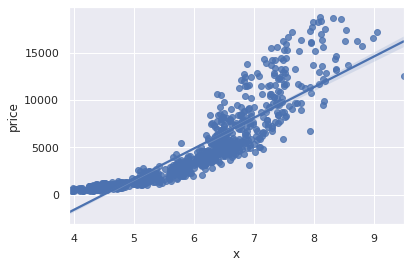

In [92]:
sns.regplot('x', 'price', data=diamonds.sample(1000));


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


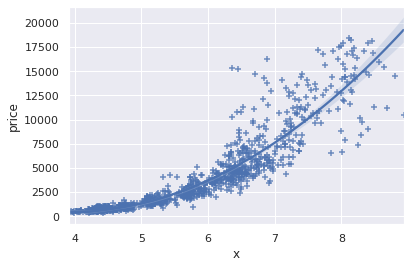

In [93]:
sns.regplot('x', 'price', data=diamonds.sample(1000), order=2, marker="+");

### Bar Plots

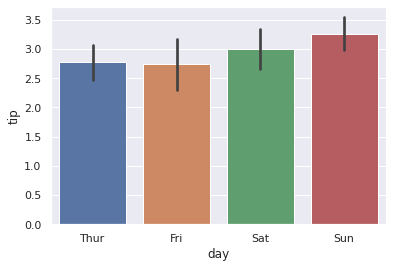

In [94]:
sns.barplot(x="day", y ="tip", data=tips);

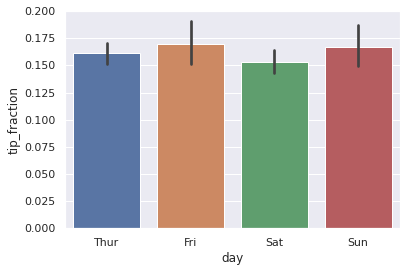

In [95]:
sns.barplot(x="day", y ="tip_fraction", data=tips);

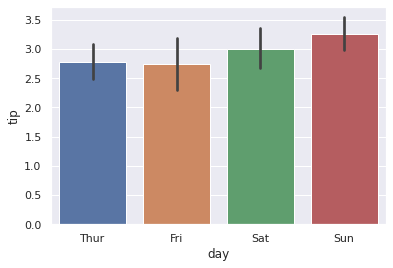

In [96]:
sns.barplot(x="day", y ="tip", data=tips);

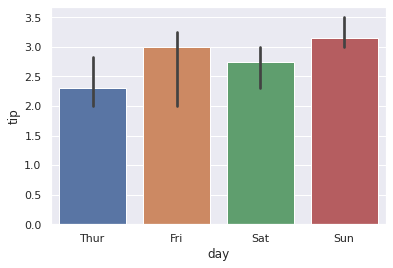

In [97]:
sns.barplot(x="day", y ="tip", data=tips, estimator=np.median);

In [98]:
def my_estimate(v):
    return np.quantile(v, 0.25)

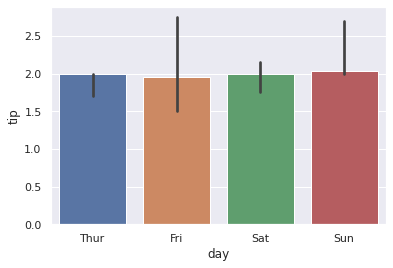

In [99]:
sns.barplot(x="day", y ="tip", data=tips, estimator=my_estimate);

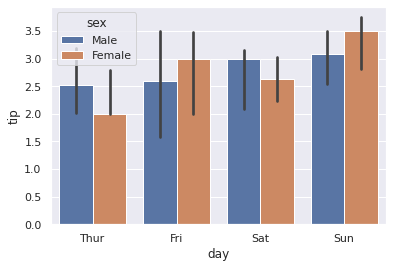

In [100]:
sns.barplot(x="day", y ="tip", hue="sex", data=tips, estimator=np.median);

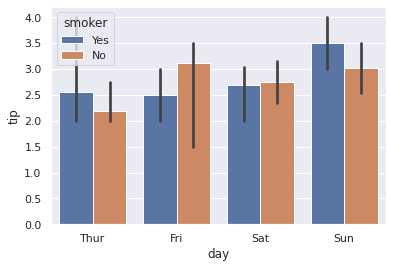

In [101]:
sns.barplot(x="day", y ="tip", hue="smoker", data=tips, estimator=np.median);

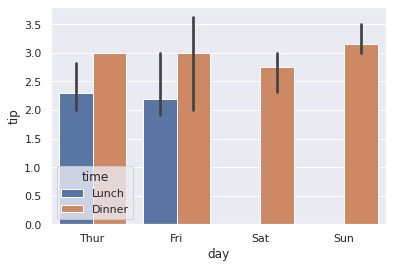

In [102]:
sns.barplot(x="day", y ="tip", hue="time", data=tips, estimator=np.median);

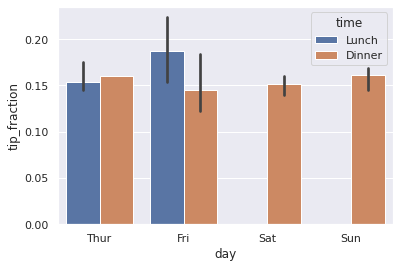

In [103]:
sns.barplot(x="day", y ="tip_fraction", hue="time", data=tips, estimator=np.median);

In [104]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


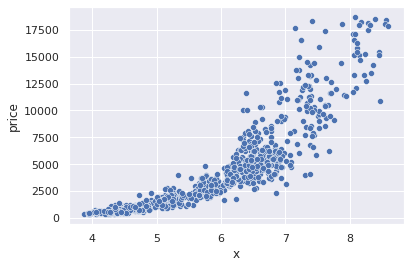

In [105]:
sns.scatterplot('x', 'price', data=diamonds.sample(1000));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


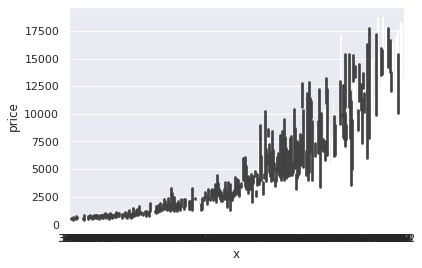

In [106]:
sns.barplot('x', 'price', data=diamonds.sample(1000));

In [107]:
diamonds['x_q'] = pd.cut(diamonds['x'], bins=15);

In [108]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.58, 4.296]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.58, 4.296]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.58, 4.296]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.58, 4.296]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(4.296, 5.012]"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


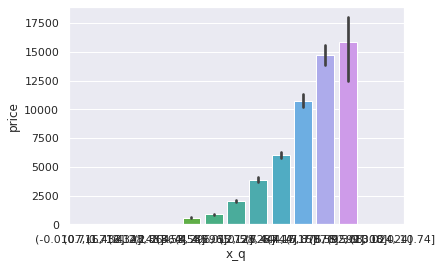

In [109]:
sns.barplot('x_q', 'price', data=diamonds.sample(1000));

In [110]:
diamonds['x_q'] = pd.cut(diamonds['x'], bins=15, labels=False);


In [111]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


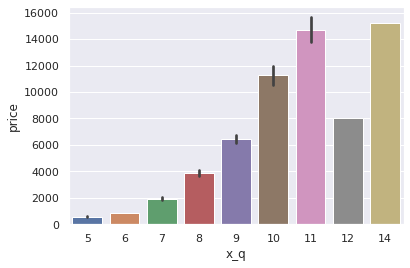

In [112]:
sns.barplot('x_q', 'price', data=diamonds.sample(1000));

### Line Plot

In [113]:
fmri = sns.load_dataset('fmri')


In [114]:
fmri.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


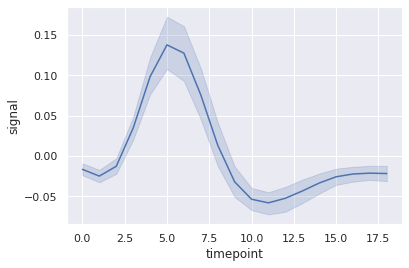

In [115]:
sns.lineplot('timepoint', 'signal', data=fmri);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


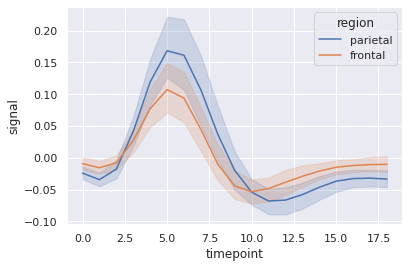

In [116]:
sns.lineplot('timepoint', 'signal', data=fmri, hue="region");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


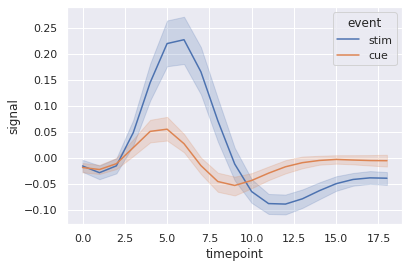

In [117]:
sns.lineplot('timepoint', 'signal', data=fmri, hue="event");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


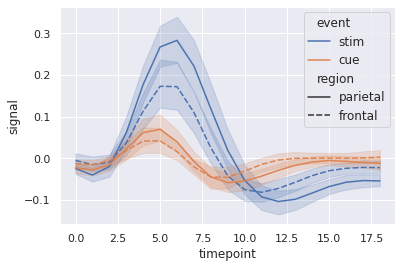

In [118]:
sns.lineplot('timepoint', 'signal', data=fmri, hue="event", style="region");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


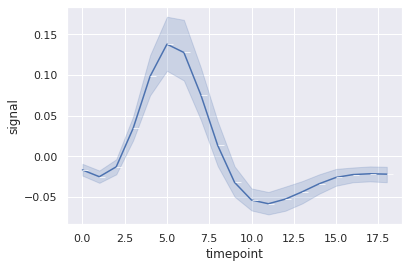

In [119]:
sns.lineplot('timepoint', 'signal', data=fmri, marker=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


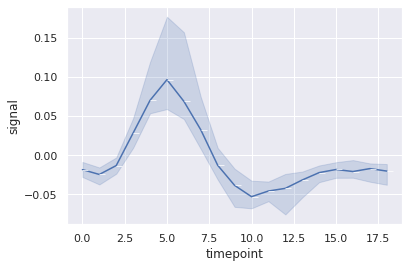

In [120]:
sns.lineplot('timepoint', 'signal', data=fmri, marker=True, estimator=np.median);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


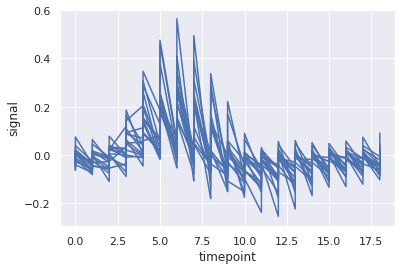

In [121]:
sns.lineplot('timepoint', 'signal', data=fmri, units='subject', estimator=None);

In [122]:
fmri_ = fmri[(fmri.region == "parietal") & (fmri.event == "cue")]
fmri_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


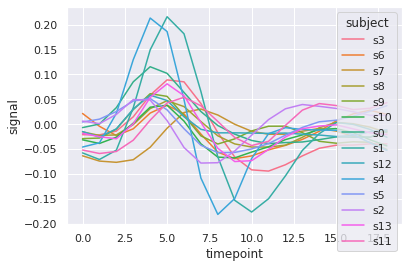

In [123]:
sns.lineplot('timepoint', 'signal', data=fmri_, hue='subject', estimator=None);

In [124]:
x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = x * x


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


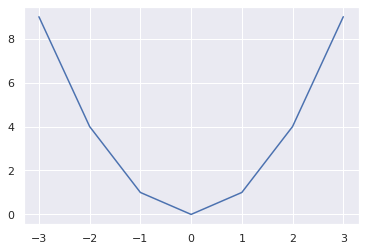

In [125]:
sns.lineplot(x, y);

In [126]:
with open('data.json') as f:
  data = json.load(f)

In [127]:
data = data['states_daily']
df = pd.json_normalize(data)


In [128]:
df['date'] = pd.to_datetime(df['date']) 

In [129]:
df.drop('tt', axis=1, inplace=True)
df.drop('dateymd', axis=1, inplace=True)


In [130]:
df.set_index('date', inplace=True)


In [131]:
df = df[df['status'] == 'Confirmed']


In [132]:
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)


In [133]:
df = df.rolling(7).mean()
df.reset_index(inplace=True)

In [134]:
df.head()


,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df_ = pd.melt(df, id_vars="date", 
              value_vars = list(df.columns).remove("date"),
              var_name = "state", value_name = "confirmed")

In [136]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,NaN
1,2020-03-15,an,NaN
2,2020-03-16,an,NaN
3,2020-03-17,an,NaN
4,2020-03-18,an,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


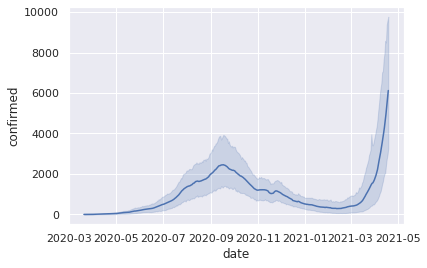

In [137]:
sns.lineplot('date', 'confirmed', data=df_);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


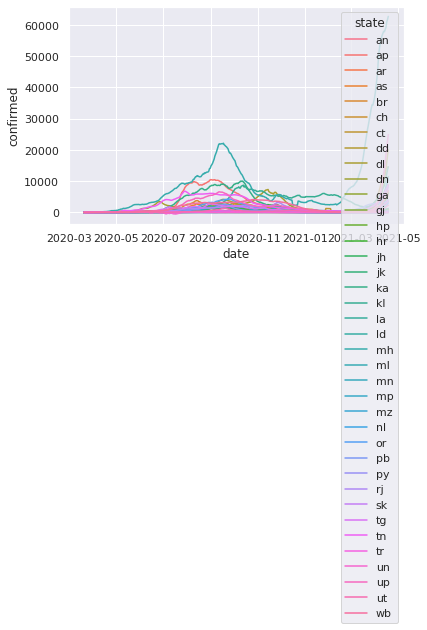

In [138]:
sns.lineplot('date', 'confirmed', hue="state", data=df_);

In [139]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']

In [140]:
df_ = df_[df_.state.isin(states)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


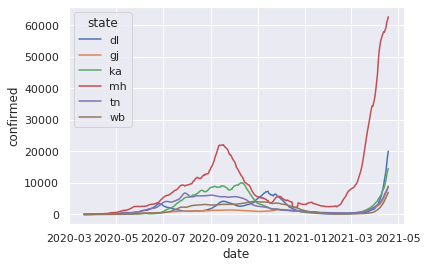

In [141]:
sns.lineplot('date', 'confirmed', hue="state", data=df_);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


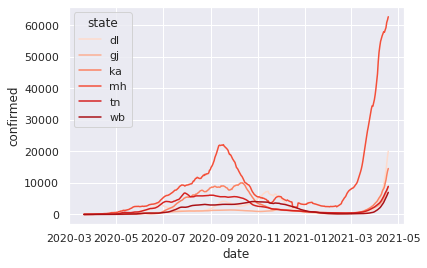

In [142]:
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


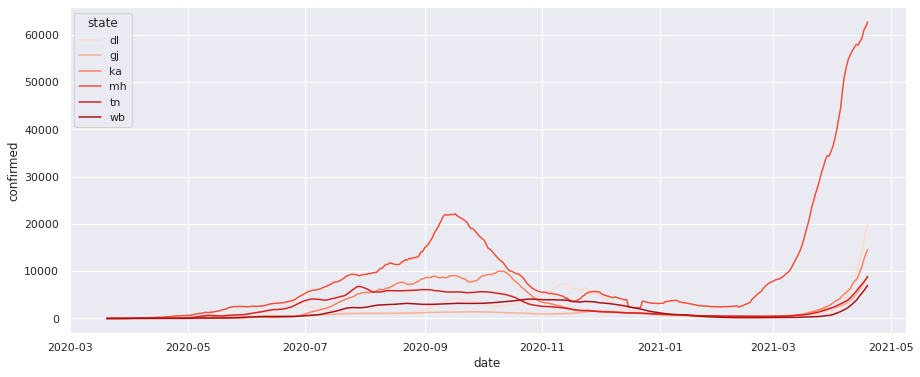

In [143]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


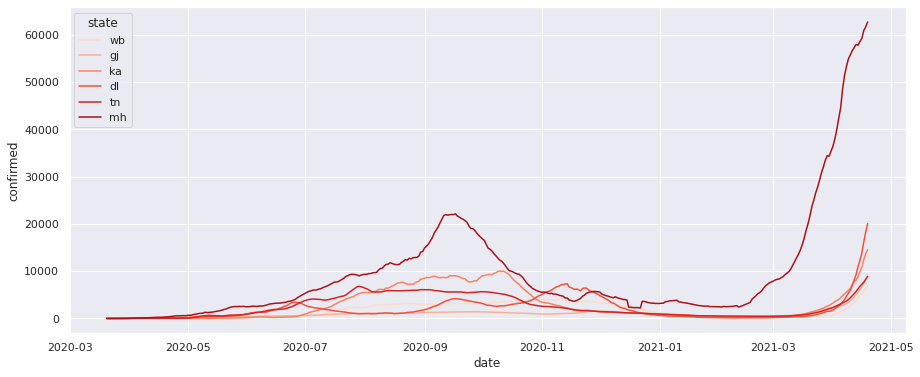

In [144]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue="state", data=df_,
             palette='Reds', hue_order = ['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);

### Heatmap

In [145]:
x = np.random.rand(10, 10)
x

array([[0.56037658, 0.42881591, 0.30634553, 0.55728644, 0.13455189,
        0.82742379, 0.2296286 , 0.470411  , 0.58198766, 0.52287571],
       [0.93433702, 0.70688428, 0.03570398, 0.39830768, 0.02077501,
        0.43863025, 0.48021307, 0.22173966, 0.51050471, 0.33225763],
       [0.45878279, 0.92813494, 0.53593263, 0.44839469, 0.09648425,
        0.25697565, 0.46360108, 0.58935724, 0.43772251, 0.35585173],
       [0.54328661, 0.91710164, 0.9796297 , 0.75021354, 0.30887839,
        0.73441039, 0.12801432, 0.00237796, 0.75308231, 0.44393415],
       [0.73807343, 0.26115502, 0.5447779 , 0.24033875, 0.577525  ,
        0.55642341, 0.40912636, 0.27020039, 0.39780088, 0.12859276],
       [0.89459991, 0.0543777 , 0.2637921 , 0.16034722, 0.47677223,
        0.67913886, 0.25755187, 0.5734475 , 0.11031651, 0.7009791 ],
       [0.30678449, 0.79466991, 0.76587967, 0.51007693, 0.27274717,
        0.88974625, 0.9187967 , 0.3001385 , 0.22319583, 0.19026886],
       [0.84674958, 0.63130109, 0.4353008

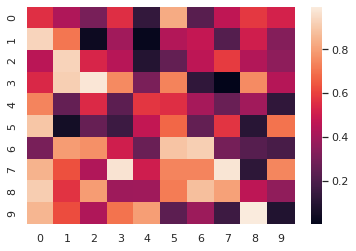

In [146]:
sns.heatmap(x)

In [147]:
flights = sns.load_dataset('flights')

In [148]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [149]:
flights.sample(10)

,year,month,passengers
53,1953,Jun,243
12,1950,Jan,115
73,1955,Feb,233
29,1951,Jun,178
19,1950,Aug,170
72,1955,Jan,242
52,1953,May,229
13,1950,Feb,126
58,1953,Nov,180
105,1957,Oct,347


In [150]:
flights_ = flights.pivot(index='year', columns='month', values='passengers');

In [151]:
flights_.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


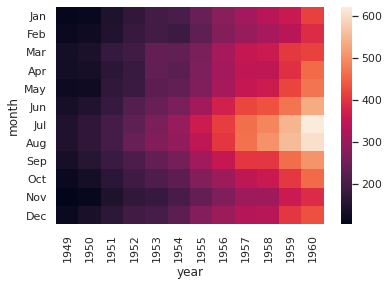

In [152]:
sns.heatmap(flights_.T)

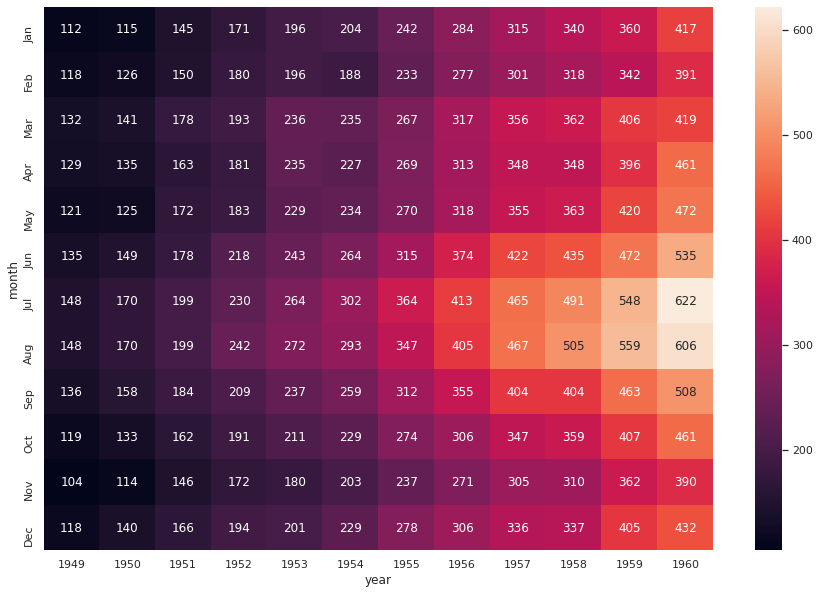

In [153]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(flights_.T, annot=True, fmt="d");

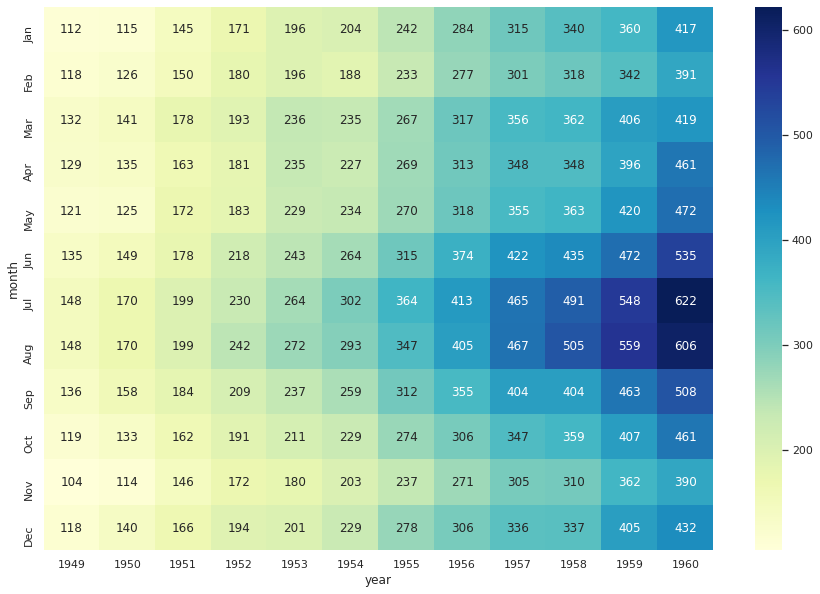

In [154]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(flights_.T, annot=True, fmt="d", cmap="YlGnBu");

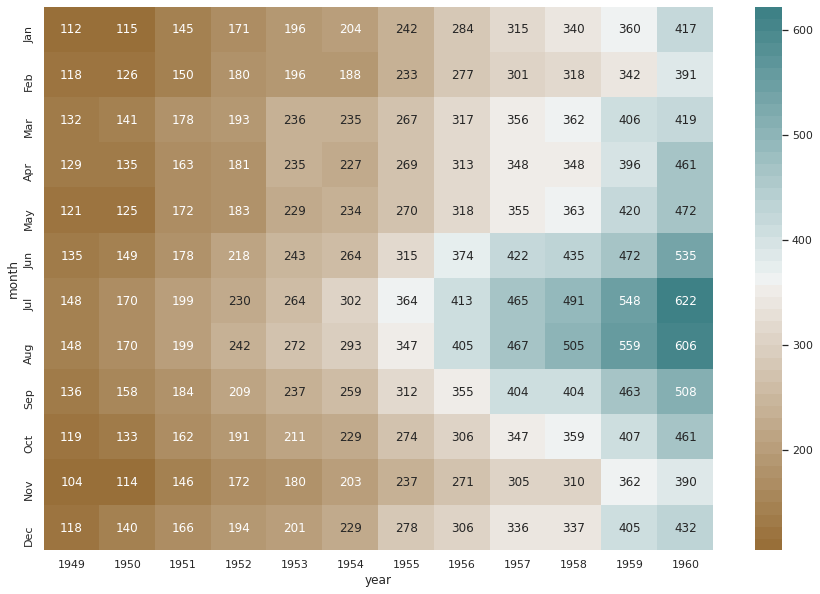

In [155]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(flights_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(50, 200, n=45));

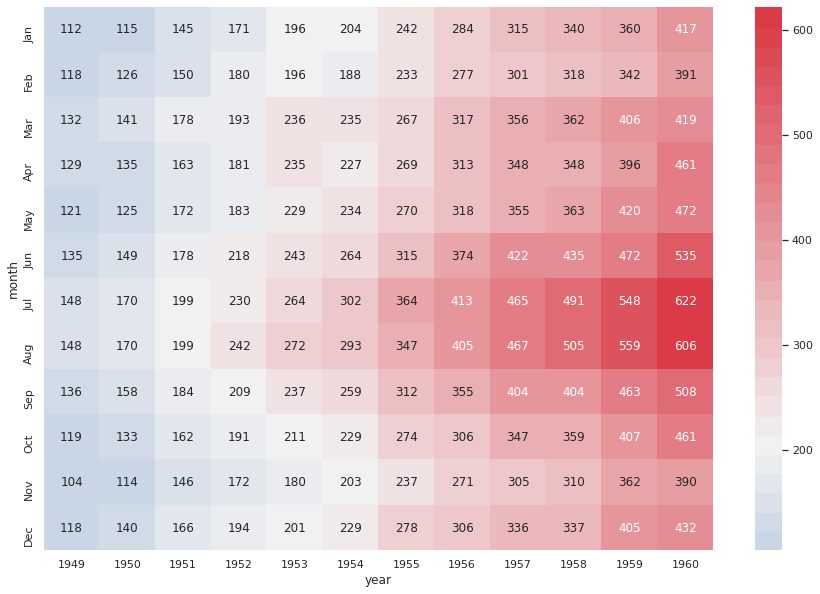

In [159]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(flights_.T, annot=True, fmt="d", 
            cmap=sns.diverging_palette(250, 10, n=45),
            center=flights_.loc[1954, 'Jan']);